# Web Scraping - Getting data for your machine learning models
- In today's world where data is key, that data can come from many different sources.
- It may come from a database, from a CSV file, document store, etc.

- In this notebook, let's instead target the web. To get that data from the web, we typically have to **scrape** the internet. What is that scraping? Let's wak through this notebook to learn more.

- We need data!
- Do you really want to copy and pase each web page? Absolutely not!
- This is where web scraping comes in:  
    - Automatic extract of data from website and databases

- While we are doing this to get threat intelligence, it can be used for:
    - competitor analysis, data mining, content aggregation, market research, etc.  
    - Do we wwant photos, text, videos, etc. We can scrape the web

- With webscraping, we want to extract what we need and more than likely store it for later analysis

**Tools available**  
-  Many tools available:  
    - BeautifulSoup   
        - Extract data from HTML and XML files   
            - Generates a parse tree that we can traverse   
            - While a great tool, not recommended for complex website scraping   
    - Selenium  
        - Focuses on browsers and can be slower  
        - It is very flexible and hence powerful webscraping tool
        - Limited support on non web based applications
        - Also slower than other scraping tools
    - Scrapy  
        - Fast, efficient and able to extract large amounts of data in short time
        - While great, not suitable for simple tasks
    - OctoParse  
        - Perfect for anyone wanting to extract data and save time learning code  
        - Uses a visual point and click interface  
        - No programming skills needed to get started 


Now that we have the tools, let's learn the techniques for scraping  
    - Document Object Model (DOM) parsing:
        - Analyzing the HTML structure of the page, to extract information from specific elements
        - DOM is a tree like structure that represents the web page
        - Requires a good understanding of HTML
        - This is where BeautifulSoup is very good
        - Requires a good understanding of HTML.
        - Also each page will be different so you need to understand the page  

    - Regular Expression:
        - Extract specific patterns from the web page
        - Now have two problems. Have to solve the original problem plus the regex problem
    
    - XPath:  
        - Language that allows you to navigate HTML documents and select specific elements or attributes
        - Can be used with LMXML or Scrapy
        - Can handle the most complicated web pages
        - Even if the page changes, you can still use XPath to extract information

- Whether scraping is legal or not is debatable.
- Whether it is ethical or not is debatable .
- Think New York Times suing Open AI
- You might want to go through the *Terms of Service* prior to scraping

- https://medium.com/geekculture/web-scraping-101-tools-techniques-and-best-practices-417e377fbeaf  

- Many websites do not welcome scraping and may block you  
- Now while these sites may allow Search Engines to scrape so they can show up in search results, they may just block you
- If you are going to be blocked, you want to appear human like and not like a bot
    - Use human tools  
    - Exhibit human like behaviour

- To prevent being blocked, you can use web scraping API - For example scraping bee
- Other ways to avoid getting blocked:
    - Use proxies  
    - Use a headless browser, such as Selenium 
        - Operates just like a browser but without an interface  

- Think about BeautifulSoup and Requests as the training wheel fro scraping  
- You can open a socket directly to the web page  
- Can use **XPATH**  
    - Can use XPATH to read an HTML document  
    - XPath Expressions  
    - Leverage XPath Engine (like XML)


*** Some Additional References for some different perspectives ***
- https://www.scrapingbee.com/blog/web-scraping-without-getting-blocked/   
- https://www.scrapingbee.com/blog/web-scraping-101-with-python/   
- https://dev.to/aurken/mastering-web-scraping-101-in-depth-guide-44k2  
- https://www.upwork.com/resources/web-scraping-basics
- https://dev.to/gologinapp/web-scraping-with-python-a-complete-step-by-step-guide-code-53fh  
- https://rvest.tidyverse.org/articles/rvest.html

In [1]:
# As always we need a set of libraries to work with
# Let us import those
import re
import requests
import numpy as np

In [2]:
# Define the URL to target
url = 'https://www.securitynik.com'
url

'https://www.securitynik.com'

In [3]:
# Get the web page
session = requests.Session()
#url = 'https://www.securitynik.com'
server_response = session.get(url=url)
server_response

<Response [200]>

In [4]:
# Get the server response length
# No length defined here
server_response.headers

{'Content-Type': 'text/html; charset=UTF-8', 'Expires': 'Wed, 24 Jul 2024 22:15:08 GMT', 'Date': 'Wed, 24 Jul 2024 22:15:08 GMT', 'Cache-Control': 'private, max-age=0', 'Last-Modified': 'Wed, 10 Jul 2024 15:29:10 GMT', 'ETag': 'W/"bc7dff59dbb1ec4431b4fb7c177468a300a1605a8b2d17f50f2440f2caccd1dd"', 'Content-Encoding': 'gzip', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Server': 'GSE', 'Transfer-Encoding': 'chunked'}

In [5]:
# Finding the length another way
server_response.text.__len__()

1175993

In [6]:
# Print the page returned
# Print the first 1000 characters
server_response.text[:1000]

'<!DOCTYPE html>\n<html class=\'v2\' dir=\'ltr\' lang=\'en\' xmlns=\'http://www.w3.org/1999/xhtml\' xmlns:b=\'http://www.google.com/2005/gml/b\' xmlns:data=\'http://www.google.com/2005/gml/data\' xmlns:expr=\'http://www.google.com/2005/gml/expr\'>\n<head>\n<link href=\'https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css\' rel=\'stylesheet\' type=\'text/css\'/>\n<!-- ADDED BY NIK -->\n<script async=\'async\' src=\'//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js\'></script>\n<script>\n  (adsbygoogle = window.adsbygoogle || []).push({\n    google_ad_client: "ca-pub-9102486211528771",\n    enable_page_level_ads: true\n  });\n</script>\n<!-- END -->\n<meta content=\'width=1100\' name=\'viewport\'/>\n<meta content=\'text/html; charset=UTF-8\' http-equiv=\'Content-Type\'/>\n<meta content=\'blogger\' name=\'generator\'/>\n<link href=\'https://www.securitynik.com/favicon.ico\' rel=\'icon\' type=\'image/x-icon\'/>\n<link href=\'https://www.securitynik.com/\' rel=\'can

In [7]:
# Time to import the BeautifulSoup library
from bs4 import BeautifulSoup

<!DOCTYPE html>

<html class="v2" dir="ltr" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:b="http://www.google.com/2005/gml/b" xmlns:data="http://www.google.com/2005/gml/data" xmlns:expr="http://www.google.com/2005/gml/expr">
<head>
<link href="https://www.blogger.com/static/v1/widgets/3566091532-css_bundle_v2.css" rel="stylesheet" type="text/css"/>
<!-- ADDED BY NIK -->
<script async="async" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<script>
  (adsbygoogle = window.adsbygoogle || []).push({
    google_ad_client: "ca-pub-9102486211528771",
    enable_page_level_ads: true
  });
</script>
<!-- END -->
<meta content="width=1100" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="blogger" name="generator"/>
<link href="https://www.securitynik.com/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.securitynik.com/" rel="canonical"/>
<link href="https://www.securitynik.com/feeds/posts/
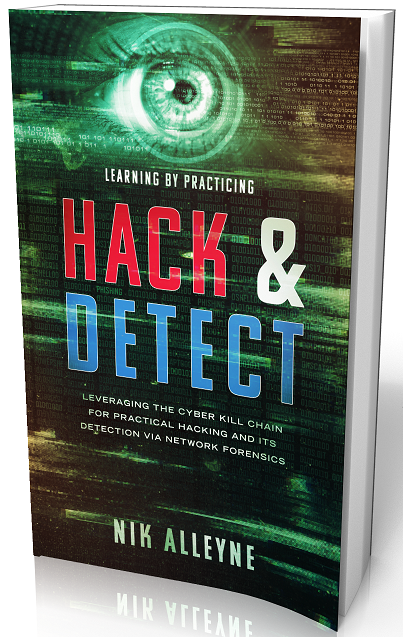
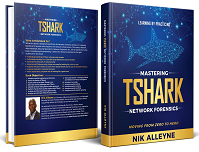

In [8]:
# Create the soup
soup = BeautifulSoup(server_response.text, 'html.parser')
soup

In [9]:
# Let's find the first 'h1' tags
# Note here it is within the tag
soup.find('h1')

<h1 class="title">
Learning by practicing
</h1>

In [10]:
# Just get the text
soup.find('h1').text

'\nLearning by practicing\n'

In [11]:
# Let's find the first 'a' tags
soup.find('a')

<a name="2854979441102037864"></a>

In [12]:
# While above produced 1 entry in each case, is that all. 
# Let's find all
soup.findAll('a')[:6]

[<a name="2854979441102037864"></a>,
 <a href="https://www.securitynik.com/2024/03/total-recall-2024-memory-forensics-self.html">**TOTAL RECALL 2024** - Memory Forensics Self-Paced Learning/Challenge/CTF</a>,
 <a href="https://www.securitynik.com/2023/09/solving-ctf-challenge-network-forensics.html" target="_blank"><i>Solving the CTF challenge - Network Forensics (packet and log analysis), USB Disk Forensics, Database Forensics, Stego</i></a>,
 <a href="https://msrc.microsoft.com/blog/2023/09/results-of-major-technical-investigations-for-storm-0558-key-acquisition/">Results of Major Technical Investigations for Storm-0558 Key Acquisition | MSRC Blog | Microsoft Security Response Center</a>,
 <a href="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiVHyGrslhh9zVntuHCw21xP7IsuqvhoJiK8zMaeAvYpvBOakeadMJWx8yugVK7Eg7vNMlILr4QNFILjxS7GyByqdSAtcsyvAQ72sRHYeVzPPUVP9IoXPqlCilGa_p1LvYt-Kp-5Q4kCjiLNuJkmy4HQQT1qo3e2MmNbNra91Hw3dHzJn_FSGp-Js2sDhw/s743/NIST-800-86.PNG" style="margin-left:

In [13]:
# Let's get the href
# This will not show anyting
# That's because there is no href there
soup.find('a').get('href')

In [14]:
# However, if we get the name which is the first entry
soup.find('a').get('name')

'2854979441102037864'

In [15]:
# Looking at the widget content
# This does not return what we expect
soup.find(class_='widget-content')

<div class="widget-content">
<script async="" crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-9102486211528771&amp;host=ca-host-pub-1556223355139109"></script>
<!-- securitynik_sidebar-right-1_AdSense1_1x1_as -->
<ins class="adsbygoogle" data-ad-client="ca-pub-9102486211528771" data-ad-format="auto" data-ad-host="ca-host-pub-1556223355139109" data-ad-slot="2741735213" data-full-width-responsive="true" style="display:block"></ins>
<script>
(adsbygoogle = window.adsbygoogle || []).push({});
</script>
<div class="clear"></div>
</div>

[<div class="widget-content">
 <script async="" crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-9102486211528771&amp;host=ca-host-pub-1556223355139109"></script>
 <!-- securitynik_sidebar-right-1_AdSense1_1x1_as -->
 <ins class="adsbygoogle" data-ad-client="ca-pub-9102486211528771" data-ad-format="auto" data-ad-host="ca-host-pub-1556223355139109" data-ad-slot="2741735213" data-full-width-responsive="true" style="display:block"></ins>
 <script>
 (adsbygoogle = window.adsbygoogle || []).push({});
 </script>
 <div class="clear"></div>
 </div>,
 <div class="widget-content">
 <ul>
 <li><a class="profile-name-link g-profile" href="https://www.blogger.com/profile/06803145785321596661" style="background-image: url(//www.blogger.com/img/logo-16.png);">Abdul</a></li>
 <li><a class="profile-name-link g-profile" href="https://www.blogger.com/profile/10282323977269843041" style="background-image: url(//www.blogger.com/img/logo-16.png);">Nik 
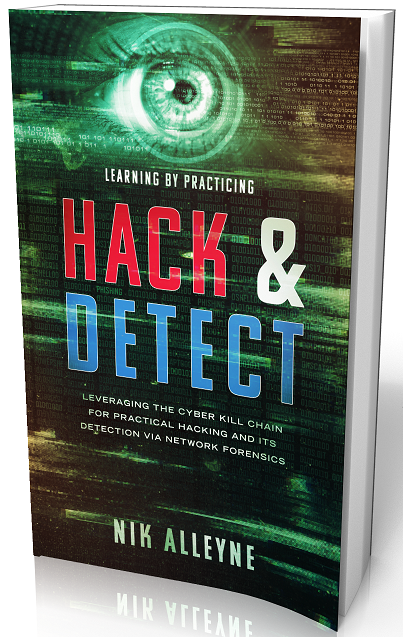
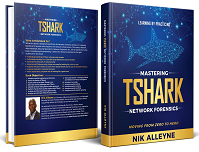

In [16]:
# We can instead use findAll or find_all to get all the records 
# That have this class name
soup.find_all(class_='widget-content')

In [17]:
# Extracting the URLs for learning sites
soup_learning_links = soup.find_all(class_='widget-content')

# Show us the 7th widget-content class
soup_learning_links[6]

<div class="widget-content">
<b>[MALICIOUS IPs]</b><br/>
<a href="http://rules.emergingthreats.net/blockrules/compromised-ips.txt">Emerging Threats - Compromised IPs</a><br/>
<a href="http://myip.ms/files/blacklist/csf/latest_blacklist.txt">My IPs</a><br/>
<a href="http://www.spamhaus.org/drop/drop.txt">Spamhause drop </a><br/>
<a href="http://www.spamhaus.org/drop/edrop.txt">Spamhause edrop </a><br/>
<a href="http://rules.emergingthreats.net/fwrules/emerging-Block-IPs.txt">Emerging Threats Block IP</a><br/>
<a href="https://www.dshield.org/ipsascii.html">DShield</a><br/>
<a href="https://isc.sans.edu/block.txt">SANS ISC</a><br/>
<a href="https://zonefiles.io/f/compromised/ip/live/">Zonefiles.io</a><br/>
<a href="https://sslbl.abuse.ch/blacklist/sslipblacklist.txt
">SSL IP Blokclist</a><br/>
<a href="https://sslbl.abuse.ch/blacklist/sslipblacklist_aggressive.txt
">SSL IP Blokclist - Aggressive</a><br/>
<a href="https://feodotracker.abuse.ch/downloads/ipblocklist_recommended.txt
">Feedo

In [18]:
# Extracting the URLs for learning sites
soup_learning_links = soup.find_all(class_='widget-content')

# Look for the class again. This time, look for href
soup_learning_links[6].find_all('a', href=True)

[<a href="http://rules.emergingthreats.net/blockrules/compromised-ips.txt">Emerging Threats - Compromised IPs</a>,
 <a href="http://myip.ms/files/blacklist/csf/latest_blacklist.txt">My IPs</a>,
 <a href="http://www.spamhaus.org/drop/drop.txt">Spamhause drop </a>,
 <a href="http://www.spamhaus.org/drop/edrop.txt">Spamhause edrop </a>,
 <a href="http://rules.emergingthreats.net/fwrules/emerging-Block-IPs.txt">Emerging Threats Block IP</a>,
 <a href="https://www.dshield.org/ipsascii.html">DShield</a>,
 <a href="https://isc.sans.edu/block.txt">SANS ISC</a>,
 <a href="https://zonefiles.io/f/compromised/ip/live/">Zonefiles.io</a>,
 <a href="https://sslbl.abuse.ch/blacklist/sslipblacklist.txt
 ">SSL IP Blokclist</a>,
 <a href="https://sslbl.abuse.ch/blacklist/sslipblacklist_aggressive.txt
 ">SSL IP Blokclist - Aggressive</a>,
 <a href="https://feodotracker.abuse.ch/downloads/ipblocklist_recommended.txt
 ">Feedotracker - recommended ip blocklist </a>,
 <a href="https://feodotracker.abuse.ch/do

In [19]:
# Extract the same info above, this time via a for loop
for url in soup_learning_links[6].find_all('a', href=True):
    print(url.get('href'))

http://rules.emergingthreats.net/blockrules/compromised-ips.txt
http://myip.ms/files/blacklist/csf/latest_blacklist.txt
http://www.spamhaus.org/drop/drop.txt
http://www.spamhaus.org/drop/edrop.txt
http://rules.emergingthreats.net/fwrules/emerging-Block-IPs.txt
https://www.dshield.org/ipsascii.html
https://isc.sans.edu/block.txt
https://zonefiles.io/f/compromised/ip/live/
https://sslbl.abuse.ch/blacklist/sslipblacklist.txt

https://sslbl.abuse.ch/blacklist/sslipblacklist_aggressive.txt

https://feodotracker.abuse.ch/downloads/ipblocklist_recommended.txt

https://feodotracker.abuse.ch/downloads/ipblocklist.txt
https://raw.githubusercontent.com/pallebone/StrictBlockPAllebone/master/BlockIP.txt
http://www.malwaredomainlist.com/hostslist/delisted.txt
https://openphish.com/feed.txt
https://raw.githubusercontent.com/notracking/hosts-blocklists/master/hostnames.txt
https://raw.githubusercontent.com/notracking/hosts-blocklists/master/hostnames.txt
https://zonefiles.io/f/compromised/domains/live

In [20]:
# If we wanted we could store these in a list:
url_list = []
for url in soup_learning_links[6].find_all('a', href=True):
    url_list.append(url.get('href'))

# print the url_list
url_list

['http://rules.emergingthreats.net/blockrules/compromised-ips.txt',
 'http://myip.ms/files/blacklist/csf/latest_blacklist.txt',
 'http://www.spamhaus.org/drop/drop.txt',
 'http://www.spamhaus.org/drop/edrop.txt',
 'http://rules.emergingthreats.net/fwrules/emerging-Block-IPs.txt',
 'https://www.dshield.org/ipsascii.html',
 'https://isc.sans.edu/block.txt',
 'https://zonefiles.io/f/compromised/ip/live/',
 'https://sslbl.abuse.ch/blacklist/sslipblacklist.txt\n',
 'https://sslbl.abuse.ch/blacklist/sslipblacklist_aggressive.txt\n',
 'https://feodotracker.abuse.ch/downloads/ipblocklist_recommended.txt\n',
 'https://feodotracker.abuse.ch/downloads/ipblocklist.txt',
 'https://raw.githubusercontent.com/pallebone/StrictBlockPAllebone/master/BlockIP.txt',
 'http://www.malwaredomainlist.com/hostslist/delisted.txt',
 'https://openphish.com/feed.txt',
 'https://raw.githubusercontent.com/notracking/hosts-blocklists/master/hostnames.txt',
 'https://raw.githubusercontent.com/notracking/hosts-blocklists

In [21]:
import pandas as pd

In [22]:
# Create a pandas dataframe from these URLs.
# Or store them in a dabase if you wish
# We can use this however, we now wish
# We will speak later of how we deal with text for machine learning
url_df = pd.DataFrame(url_list, columns=['urls'])
url_df

,urls
0,http://rules.emergingthreats.net/blockrules/co...
1,http://myip.ms/files/blacklist/csf/latest_blac...
2,http://www.spamhaus.org/drop/drop.txt
3,http://www.spamhaus.org/drop/edrop.txt
4,http://rules.emergingthreats.net/fwrules/emerg...
5,https://www.dshield.org/ipsascii.html
6,https://isc.sans.edu/block.txt
7,https://zonefiles.io/f/compromised/ip/live/
8,https://sslbl.abuse.ch/blacklist/sslipblacklis...
9,https://sslbl.abuse.ch/blacklist/sslipblacklis...


In [23]:
# Maybe you wish to share this list to add the URLs to one of your threat intelligence tools
# Note you can save in many different formats
url_df.to_csv(path_or_buf=r'./urls.csv')

In [24]:
# Validate the file was created
!dir urls.csv /b

urls.csv


In [25]:
url_df.values[0][0]

'http://rules.emergingthreats.net/blockrules/compromised-ips.txt'

In [26]:
# a sample IP looks like: 192.168.0.1

# Setup the IPv4 regex
ipv4_regex = re.compile(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}')
ipv4_regex

re.compile(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', re.UNICODE)

In [27]:
# Test string
test_string = 'Welcome to securitynik.com 10.0.111.1 us get the IP addresses 1.2.3.4'
test_string

'Welcome to securitynik.com 10.0.111.1 us get the IP addresses 1.2.3.4'

In [28]:
# Demonstrate how we find the IP
ipv4_regex.findall(test_string)

['10.0.111.1', '1.2.3.4']

In [29]:
# Read all data

# Setup a list for storing the scraped IPs
scraped_ips = []

# Only take the first 2. Just making a point
for idx, link in enumerate(url_df.values[:2]):
   print(f'Link: {idx}: {link[0]} : bytes: {len(server_response.content)} ')
   server_response = requests.get(link[0])
   #print(f'\tReceived:  bytes')
   scraped_ips.append(ipv4_regex.findall(server_response.text)) 

Link: 0: http://rules.emergingthreats.net/blockrules/compromised-ips.txt : bytes: 1175993 
Link: 1: http://myip.ms/files/blacklist/csf/latest_blacklist.txt : bytes: 4165 


In [30]:
# Take a look at the scaped IPs.
scraped_ips

[['101.47.6.209',
  '103.10.55.198',
  '103.195.238.130',
  '103.90.84.153',
  '104.143.77.8',
  '104.248.172.102',
  '106.70.252.79',
  '107.148.174.118',
  '111.91.178.253',
  '112.168.205.145',
  '112.184.169.224',
  '112.54.220.94',
  '115.23.23.103',
  '116.105.209.189',
  '116.105.219.220',
  '116.105.219.27',
  '116.105.223.7',
  '116.110.115.57',
  '116.110.127.227',
  '116.110.16.166',
  '116.110.209.64',
  '116.110.213.142',
  '116.110.22.49',
  '116.110.23.138',
  '116.110.30.32',
  '116.110.31.231',
  '116.110.64.39',
  '116.110.77.235',
  '116.110.79.212',
  '116.110.82.205',
  '116.110.93.194',
  '116.110.95.93',
  '116.42.92.16',
  '116.98.160.20',
  '116.98.163.124',
  '116.98.165.59',
  '116.98.167.11',
  '116.98.168.191',
  '116.98.168.253',
  '116.98.170.73',
  '116.98.171.55',
  '116.98.174.235',
  '118.107.44.111',
  '118.194.255.11',
  '119.161.97.162',
  '121.135.178.32',
  '122.179.153.121',
  '124.237.215.139',
  '128.199.25.206',
  '128.199.30.13',
  '129.80.2

In [31]:
# We can see this looks like a list of list, let's flatten it
# Cheating here
scraped_ip_df = pd.DataFrame([ item for item in scraped_ips ][0], columns=['raw_ip'] )
scraped_ip_df

,raw_ip
0,101.47.6.209
1,103.10.55.198
2,103.195.238.130
3,103.90.84.153
4,104.143.77.8
...,...
284,95.181.173.153
285,95.214.27.139
286,95.214.27.253
287,96.77.25.60


In [32]:
# Let's say we had that IP 192.168.0.1
ip = '192.168.0.1'
ip

'192.168.0.1'

In [33]:
# What we want to do is split this into individual numbers
ip.split('.')

['192', '168', '0', '1']

In [34]:
# However, we need this as a number not a string
type(ip.split('.')[0])

str

In [35]:
# Getting this as an int
in_ip = [ int(item) for item in ip.split('.') ]
in_ip

[192, 168, 0, 1]

In [36]:
# We can also now confirm that these values are numbers
type(in_ip[0])

int

In [37]:
# We can use these IPs as is and treat them all like a strings
# I don't think this is a good strategy as we would still need to get these in as numbers
# Let's try splitting the instead and get each octet as a number
scraped_ip_df[['oct_1', 'oct_2', 'oct_3', 'oct_4']] = scraped_ip_df['raw_ip'].str.split('.',  expand=True)
scraped_ip_df

,raw_ip,oct_1,oct_2,oct_3,oct_4
0,101.47.6.209,101,47,6,209
1,103.10.55.198,103,10,55,198
2,103.195.238.130,103,195,238,130
3,103.90.84.153,103,90,84,153
4,104.143.77.8,104,143,77,8
...,...,...,...,...,...
284,95.181.173.153,95,181,173,153
285,95.214.27.139,95,214,27,139
286,95.214.27.253,95,214,27,253
287,96.77.25.60,96,77,25,60


In [38]:
# We can use the number above as is or scale them
# We might instead want to convert them to their binary representation
np.binary_repr(4, width=8)

'00000100'

In [39]:
# https://stackoverflow.com/questions/2733788/convert-ip-address-string-to-binary-in-python 

ip_addr = '192.168.0.1'
print(list(''.join([ np.binary_repr(int(ip), width=8) for ip in ip_addr.split('.')])))

['1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1']


In [40]:
# Add the columns as binary
scraped_ip_df['combined_bits'] = scraped_ip_df['raw_ip'].apply(lambda x: ''.join(np.binary_repr(int(i), width=8) for i in x.split('.')))
scraped_ip_df

,raw_ip,oct_1,oct_2,oct_3,oct_4,combined_bits
0,101.47.6.209,101,47,6,209,01100101001011110000011011010001
1,103.10.55.198,103,10,55,198,01100111000010100011011111000110
2,103.195.238.130,103,195,238,130,01100111110000111110111010000010
3,103.90.84.153,103,90,84,153,01100111010110100101010010011001
4,104.143.77.8,104,143,77,8,01101000100011110100110100001000
...,...,...,...,...,...,...
284,95.181.173.153,95,181,173,153,01011111101101011010110110011001
285,95.214.27.139,95,214,27,139,01011111110101100001101110001011
286,95.214.27.253,95,214,27,253,01011111110101100001101111111101
287,96.77.25.60,96,77,25,60,01100000010011010001100100111100


In [41]:
# Wrap this up and split these into a new column
# Each bit is its own column
scraped_df_bits = scraped_ip_df['combined_bits'].str.join(sep=' ').str.split(pat=' ', expand=True).astype(int)
scraped_df_bits

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,1,1,0,0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,0,1
1,0,1,1,0,0,1,1,1,0,0,...,1,1,1,1,0,0,0,1,1,0
2,0,1,1,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
3,0,1,1,0,0,1,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,0,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,1,0,1,1,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
285,0,1,0,1,1,1,1,1,1,1,...,1,1,1,0,0,0,1,0,1,1
286,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
287,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,0


In [42]:
# Let's change the column names
scraped_df_bits.columns = [ f'bit_{i}' for i in range(32) ]
scraped_df_bits

,bit_0,bit_1,bit_2,bit_3,bit_4,bit_5,bit_6,bit_7,bit_8,bit_9,...,bit_22,bit_23,bit_24,bit_25,bit_26,bit_27,bit_28,bit_29,bit_30,bit_31
0,0,1,1,0,0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,0,1
1,0,1,1,0,0,1,1,1,0,0,...,1,1,1,1,0,0,0,1,1,0
2,0,1,1,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
3,0,1,1,0,0,1,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,0,1,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,1,0,1,1,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
285,0,1,0,1,1,1,1,1,1,1,...,1,1,1,0,0,0,1,0,1,1
286,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
287,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,1,1,1,1,0,0


In [43]:
# Let's put the two dataframes together
final_df = pd.concat([scraped_ip_df, scraped_df_bits], axis=1)
final_df

,raw_ip,oct_1,oct_2,oct_3,oct_4,combined_bits,bit_0,bit_1,bit_2,bit_3,...,bit_22,bit_23,bit_24,bit_25,bit_26,bit_27,bit_28,bit_29,bit_30,bit_31
0,101.47.6.209,101,47,6,209,01100101001011110000011011010001,0,1,1,0,...,1,0,1,1,0,1,0,0,0,1
1,103.10.55.198,103,10,55,198,01100111000010100011011111000110,0,1,1,0,...,1,1,1,1,0,0,0,1,1,0
2,103.195.238.130,103,195,238,130,01100111110000111110111010000010,0,1,1,0,...,1,0,1,0,0,0,0,0,1,0
3,103.90.84.153,103,90,84,153,01100111010110100101010010011001,0,1,1,0,...,0,0,1,0,0,1,1,0,0,1
4,104.143.77.8,104,143,77,8,01101000100011110100110100001000,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,95.181.173.153,95,181,173,153,01011111101101011010110110011001,0,1,0,1,...,0,1,1,0,0,1,1,0,0,1
285,95.214.27.139,95,214,27,139,01011111110101100001101110001011,0,1,0,1,...,1,1,1,0,0,0,1,0,1,1
286,95.214.27.253,95,214,27,253,01011111110101100001101111111101,0,1,0,1,...,1,1,1,1,1,1,1,1,0,1
287,96.77.25.60,96,77,25,60,01100000010011010001100100111100,0,1,1,0,...,0,1,0,0,1,1,1,1,0,0


In [44]:
# Let's adjust the columns
#final_df.rename(columns=dict(zip(final_df.columns[6:], [ f'bit_{i}' for i in range(32) ])), inplace=True)
#final_df


In [45]:
# Our information that can be sent to a model
X = scraped_df_bits.values
X

array([[0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

In [46]:
# At this point, you can plug your data into your supa dupa cool algorithm
from sklearn.cluster import KMeans

In [47]:
# That's it for this session
my_supa_dupa_algo = KMeans().fit(X)
my_supa_dupa_algo

KMeans()